In [ ]:
import pandas as pd
df=pd.read_csv('/content/blogs.csv',engine='python',on_bad_lines='skip')
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
df.shape

(2000, 2)

In [ ]:
df.columns.tolist()

['Data', 'Labels']

In [ ]:
df.isnull().sum()

,0
Data,0
Labels,0


In [ ]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
stemmer=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt',download_dir='/usr/local/share/nltk_data')

[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
def preprocess_text(text):
  text=text.lower()
  text = re.sub(r'[^a-z\s]', '', text)


  words = word_tokenize(text)

  # Removim=ng stopwords and stem the remaining words
  words = [stemmer.stem(word) for word in words if word not in stop_words]

  return ' '.join(words)

df['Processed_Text'] = df['Data'].apply(preprocess_text)


print(df[['Data', 'Processed_Text']].head())

                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                      Processed_Text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroup altath path cantaloupesrvcscmueducra...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altath talkreligion...  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
# Fit and transform the processed text
X = vectorizer.fit_transform(df['Processed_Text'])
print(X.shape)


(2000, 5000)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Labels'], test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8375
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.80      0.89      0.84        18
 comp.os.ms-windows.misc       0.83      0.91      0.87        22
comp.sys.ibm.pc.hardware       0.83      0.76      0.79        25
   comp.sys.mac.hardware       0.77      0.81      0.79        21
          comp.windows.x       0.92      0.88      0.90        25
            misc.forsale       1.00      0.67      0.80        18
               rec.autos       0.95      1.00      0.97        18
         rec.motorcycles       0.88      0.94      0.91        16
      rec.sport.baseball       0.86      1.00      0.92        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment from text
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Applying sentiment analysis to each blog post
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Checking the sentiment distribution
print(df['Sentiment'].value_counts())


Sentiment
positive    1334
negative     631
neutral       35
Name: count, dtype: int64


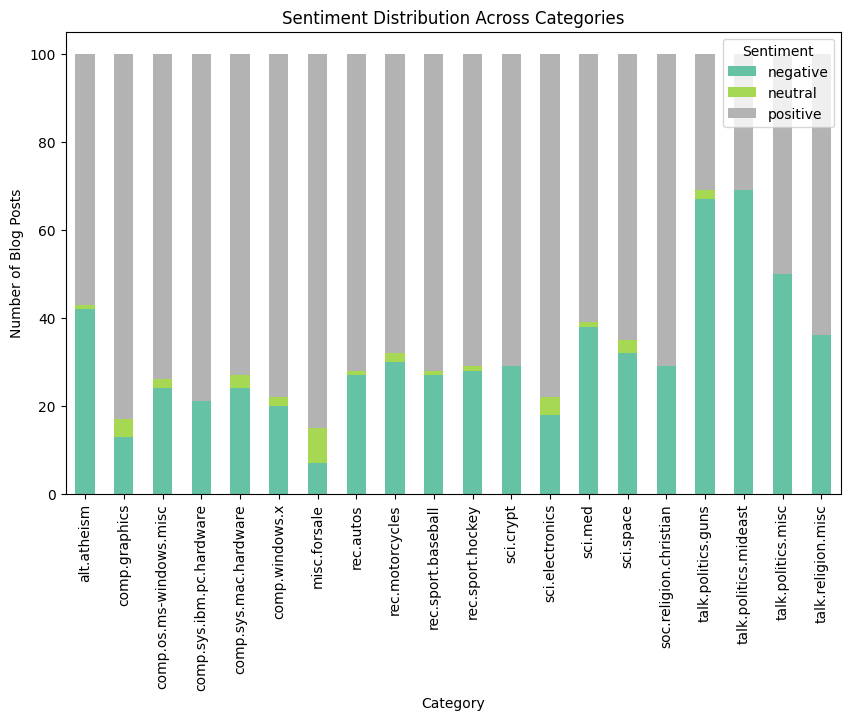

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a DataFrame with 'Category' and 'Sentiment'
sentiment_by_category = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

# Plot
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Blog Posts")
plt.xticks(rotation=90)
plt.show()

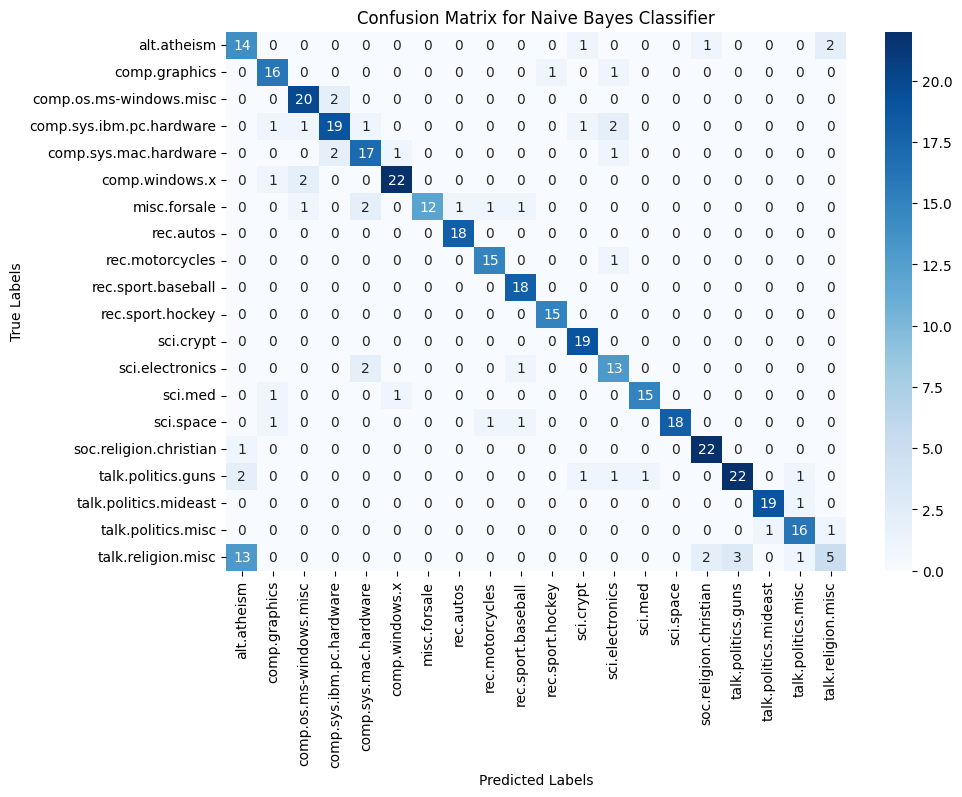

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**Text Classification and Sentiment Analysis Using Naive Bayes**

**1. Objective**
The goal of this assignment was to build a text classification model to categorize blog posts into predefined labels using the Naive Bayes algorithm. Additionally, sentiment analysis was performed to evaluate the emotional tone of the blog content.

---

**2. Dataset Overview**
- **Total records**: 3000+ blog posts
- **Features**:
  - `Data`: Raw blog post text
  - `Labels`: Category of the blog post

---

**3. Preprocessing Steps**
- Converted text to lowercase
- Removed special characters and punctuation
- Tokenized the text
- Removed stopwords using NLTK
- Applied stemming using `PorterStemmer`
- Stored the cleaned text in a new column `Processed_Text`

---

**4. Feature Extraction**
Used **TF-IDF Vectorization** (`TfidfVectorizer`) to transform text data into numerical form:
- Limited to 5000 features for efficiency
- Resulting shape: (number of samples × 5000)

---

**5. Model Building and Evaluation**
- **Model**: Multinomial Naive Bayes (`MultinomialNB`)
- **Train/Test Split**: 80/20 split using `train_test_split`

**Results**:
- **Accuracy**: **0.84**
- **Classification Report**: Provided precision, recall, and F1-score for each category. Most categories achieved high F1-scores, especially `sci.space`, `rec.sport.hockey`, and `soc.religion.christian`.

---

**6. Sentiment Analysis**
- Used **VADER** (Valence Aware Dictionary for Sentiment Reasoning) for sentiment detection
- Sentiment categories: `positive`, `negative`, and `neutral`
- Sentiment distribution was visualized using a **stacked bar plot** grouped by category

---

**7. Confusion Matrix**
- Displayed model performance visually using a **confusion matrix heatmap**
- Showed where misclassifications occurred across the categories

---

**8. Conclusions**
- The model performed well with an overall accuracy of **84%**
- Certain categories had nearly perfect precision and recall
- Sentiment analysis added an extra layer of insight into blog content
- The combination of preprocessing, TF-IDF, and Naive Bayes proved effective for multi-class text classification

---
